# Numpy ndarray 多维数组对象

## Numpy 在内部将数据存储在连续的内存块上

In [3]:
import numpy as np
my_arr = np.arange(1000000)
my_list=list(range(1000000))

%time for _ in range(10):my_arr2 = my_arr *2
%time for _ in range(10):my_list2 = [x * 2 for x in my_list ]   

CPU times: user 12.3 ms, sys: 4.95 ms, total: 17.3 ms
Wall time: 17.5 ms
CPU times: user 561 ms, sys: 164 ms, total: 724 ms
Wall time: 728 ms


## 生成 ndarray

In [5]:
data1 = [6,7.5,8,0,1]
arr1 = np.array(data1)
arr1

array([6. , 7.5, 8. , 0. , 1. ])

In [6]:
# 嵌套序列
data2 = [[1,2,3,4],[5,6,7,8]]
arr2 = np.array(data2)
arr2

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

每个数组都有一个 shape ,来表示维度的大小：

In [13]:
arr2.shape

(2, 4)

dtype 用来表示data type：

In [15]:
arr1.dtype

dtype('float64')

In [16]:
arr2.dtype

dtype('int64')

除了 np.array，还有其他一些函数能创建数组。比如 zeros,ones, 另外还可以在一个 tuple 中指定 shape：

In [18]:
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [19]:
np.zeros((3,6))

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [20]:
np.empty((2,3,2))

array([[[0.00000000e+000, 0.00000000e+000],
        [0.00000000e+000, 0.00000000e+000],
        [0.00000000e+000, 0.00000000e+000]],

       [[0.00000000e+000, 0.00000000e+000],
        [0.00000000e+000, 0.00000000e+000],
        [0.00000000e+000, 2.26718705e-314]]])

np.empty 并不能保证返回所有是 0 的数组，有些时候他可能会返回会初始化的垃圾数值，比如上面                         
arange 是 python 内建函数 range 的数组版

In [24]:
np.arange(15)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

以下是一些创建数组的函数：
%%html
<img src="./numpy_create.png" width="80%">

## ndarray 的数据类型

In [29]:
arr1 = np.array([1,2,3],dtype=np.float64)

In [30]:
arr2 = np.array([1,2,3],dtype=np.int32)

In [31]:
arr1.dtype

dtype('float64')

In [32]:
arr2.dtype

dtype('int32')

dtype 才是 numpy 能与其他系统数据灵活交互的原因。       
可以用 astype 方法显示转换数组的数据类型：

In [33]:
arr = np.array([1,2,3,4,5])

In [34]:
arr.dtype

dtype('int64')

In [35]:
float_arr = arr.astype(np.float64)
float_arr.dtype

dtype('float64')

上面是把 int 变成了 float，如果把 float 变为 int，小数点后面部分会被丢弃：

In [36]:
arr = np.array([3.7,-1.2,-2.6,0.5,12.9,10.1])
arr

array([ 3.7, -1.2, -2.6,  0.5, 12.9, 10.1])

In [37]:
arr.astype(np.int32)

array([ 3, -1, -2,  0, 12, 10], dtype=int32)

还可以用 astype 将string 中的数字变为实际的数字：

In [38]:
numeric_string = np.array(['1.25','-9.6','42'],dtype=np.string_)
numeric_string

array([b'1.25', b'-9.6', b'42'], dtype='|S4')

In [39]:
numeric_string.astype(float)

array([ 1.25, -9.6 , 42.  ])

要十分注意 np.string_ 类型，这种类型的长度是固定的，所以可能会直接截取部分而不出警告。              
如果转换（casting）失败的话，会给出一个 ValueError 的提示。                
这里直接使用 float 来代替 np.float64，是因为 Numpy 可以使用相同别名来表征与 python 精度相同的 python 数据类型。             
可以使用其他数组的 dtype 来直接定制：

In [40]:
int_array = np.arange(10)
calibers = np.array([.22,.270,.357,.380,.44,.50],dtype=np.float64)

In [41]:
int_array.astype(calibers.dtype)

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

还可以使用类型缩写，比如 u4 就是 uint32：

In [43]:
empty_uint32 = np.empty(8,dtype='u4')
empty_uint32

array([         0, 1075314688,          0, 1075707904,          0,
       1075838976,          0, 1072693248], dtype=uint32)

记住，astype 总是生成一个新数组，即使你传入的 dtype 与之前一样。

## Numpy 数组算术

数组之所以重要，是因为它允许进行批量操作而无需任何 for 循环。这种特性称之为 vectorization (向量化)。任何两个大小相等的数组之间的运算，都是element-wise（点对点）。

In [46]:
arr = np.array([[1.,2.,3.],[4.,5.,6.]])
arr

array([[1., 2., 3.],
       [4., 5., 6.]])

In [48]:
arr * arr

array([[ 1.,  4.,  9.],
       [16., 25., 36.]])

In [49]:
arr - arr

array([[0., 0., 0.],
       [0., 0., 0.]])

点对点，就是两个数组运算，在同一个位置的元素之间才会进行运算。                  
这种操作如果涉及标量，就会把计算参数传递给数组的每一个元素：

In [51]:
1 / arr

array([[1.        , 0.5       , 0.33333333],
       [0.25      , 0.2       , 0.16666667]])

In [52]:
arr * 0.5

array([[0.5, 1. , 1.5],
       [2. , 2.5, 3. ]])

同尺寸数组之间的比较，会产生一个布尔数组：

In [55]:
arr2 = np.array([[0.,4.,1.],[7.,2.,12.]])

In [56]:
arr2

array([[ 0.,  4.,  1.],
       [ 7.,  2., 12.]])

In [57]:
arr2 > arr

array([[False,  True, False],
       [ True, False,  True]])

## 基本索引与切片

In [58]:
arr= np.arange(10)

In [59]:
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [60]:
arr[5]

5

In [61]:
arr[5:8]

array([5, 6, 7])

In [62]:
arr[5:8]=12

In [63]:
arr

array([ 0,  1,  2,  3,  4, 12, 12, 12,  8,  9])

python 内建的 list 与 numpy 的 array 有个明显的区别，这里的 array 的切片后的结果只是一个 views（视图），任何对于视图的修改都会反映到原数组，而不是创建新的 array。但是 list 的切片是产生了一个新的 list。

In [65]:
arr_slice = arr[5:8]
arr_slice

array([12, 12, 12])

如果我们改变 arr_slice 的值，会反映到原数组 arr 上：

In [66]:
arr_slice[1]=12345

In [67]:
arr

array([    0,     1,     2,     3,     4,    12, 12345,    12,     8,
           9])

[:] 这个赋值给所有元素：

In [68]:
arr_slice[:]=64

In [70]:
arr

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

之所以这样设计，是因为基于性能和内存的考虑，毕竟如果总是复制数据的话，很影响运算时间。numpy 被设计成适合处理非常大的数组，持续复制会引起很大的内存问题。如果你还是想要一份数组切片的拷贝而不是一份视图的话，你就必须显示地复制这个数组，例如arr[5:8].copy()      

在二维数组里，单一的索引指代的是一维数组：

In [71]:
arr2d = np.array([[1,2,3],[4,5,6],[7,8,9]])
arr2d[2]

array([7, 8, 9])

对于多维数组，可以省略后续索引值，返回的对象将是降低一个维度的数组：

In [80]:
arr3d=np.array([[[1,2,3],[4,5,6]],[[7,8,9],[10,11,12]]])

In [81]:
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [82]:
arr3d[0]

array([[1, 2, 3],
       [4, 5, 6]])

标量和数组都可以传递给 arr3d[0]：

In [83]:
old_values = arr3d[0].copy()

arr3d[0]=42

arr3d

array([[[42, 42, 42],
        [42, 42, 42]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [84]:
arr3d[0]=old_values

arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

arr3d[1,0] 可以返回一个一维数组：

In [88]:
arr3d[1,0]

array([7, 8, 9])

In [89]:
x = arr3d[1]

In [90]:
x

array([[ 7,  8,  9],
       [10, 11, 12]])

In [91]:
x[0]

array([7, 8, 9])

一定要牢记这些切片后返回的数组都是 views。

## 数组的切片索引

In [92]:
arr

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

In [93]:
arr[1:6]

array([ 1,  2,  3,  4, 64])

二维的话，数组的切片有点不同：

In [94]:
arr2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [96]:
arr2d[:2]

array([[1, 2, 3],
       [4, 5, 6]])

可以看到，切片是沿着 行 来处理的，所以，数组中的切片，要沿着设置的 axis 来处理的。                    
可以使用复数切片：

In [99]:
arr2d[:2,1:]  # 前两行，第二列之后

array([[2, 3],
       [5, 6]])

选择第二行，但是只选择前两列：

In [100]:
arr2d[1,:2]

array([4, 5])

选择第三列，前两行：

In [102]:
arr2d[:2,2]

array([3, 6])

冒号表示提取整个 axis（轴）：

In [105]:
arr2d[:,:1]

array([[1],
       [4],
       [7]])

赋值也很方便：

In [106]:
arr2d[:2,:1]=0

In [107]:
arr2d

array([[0, 2, 3],
       [0, 5, 6],
       [7, 8, 9]])

## 布尔索引

假如我们的数据中有一些重复，这里我们用 numpy.random.randn 函数来随机生成一些离散数据：

In [114]:
names = np.array(['Bob','Joe','Will','Bob','Will','Joe','Joe'])
names

array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'], dtype='<U4')

In [115]:
data = np.random.randn(7,4)
data

array([[ 0.52282334, -0.8230265 ,  0.67380716, -0.9993936 ],
       [-1.11158201, -0.28252611, -0.50854691, -0.51765078],
       [ 0.55827946,  0.39448841, -1.25714944,  0.1543107 ],
       [ 0.0731648 ,  1.35426168, -1.6171362 ,  0.38291706],
       [-0.26702082, -1.14787431,  0.26336219,  0.12699351],
       [-0.04644553,  1.13707375, -0.10143517,  1.00984458],
       [ 0.05310567,  1.16899982,  1.36276839,  0.01163362]])

假设每个 name 对应 data 数组中的一行，我们想要选中 name 为 Bob 的所有行，就像四则运算，用比较运算符（==）：

In [118]:
names == 'Bob'

array([ True, False, False,  True, False, False, False])

然后用这个布尔数组当做索引：

In [119]:
data[names=='Bob']

array([[ 0.52282334, -0.8230265 ,  0.67380716, -0.9993936 ],
       [ 0.0731648 ,  1.35426168, -1.6171362 ,  0.38291706]])

注意，布尔数组和 data 数组的长度要一样。        
我们可以选中 names=='Bob' 的行，然后索引列：

In [120]:
data[names=='Bob',2:]

array([[ 0.67380716, -0.9993936 ],
       [-1.6171362 ,  0.38291706]])

In [121]:
data[names=='Bob',3]

array([-0.9993936 ,  0.38291706])

选择除了 'Bob' 以外的其他数据，可以使用 != 或 ~

In [122]:
names != 'Bob'

array([False,  True,  True, False,  True,  True,  True])

In [123]:
data[~(names == 'Bob')]

array([[-1.11158201, -0.28252611, -0.50854691, -0.51765078],
       [ 0.55827946,  0.39448841, -1.25714944,  0.1543107 ],
       [-0.26702082, -1.14787431,  0.26336219,  0.12699351],
       [-0.04644553,  1.13707375, -0.10143517,  1.00984458],
       [ 0.05310567,  1.16899982,  1.36276839,  0.01163362]])

当要反转一个条件时，用 ~ 操作符很方便：

In [124]:
cond = names =="Bob"
data[~cond]

array([[-1.11158201, -0.28252611, -0.50854691, -0.51765078],
       [ 0.55827946,  0.39448841, -1.25714944,  0.1543107 ],
       [-0.26702082, -1.14787431,  0.26336219,  0.12699351],
       [-0.04644553,  1.13707375, -0.10143517,  1.00984458],
       [ 0.05310567,  1.16899982,  1.36276839,  0.01163362]])

选中 2 个或 3 个名字，组合多个布尔条件，用布尔运算符 &，|，另外 python 中的关键词 and 和 or 不管用：

In [125]:
names

array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'], dtype='<U4')

In [126]:
mask = (names == 'Bob') | (names == 'Will')
mask

array([ True, False,  True,  True,  True, False, False])

In [128]:
data[mask]

array([[ 0.52282334, -0.8230265 ,  0.67380716, -0.9993936 ],
       [ 0.55827946,  0.39448841, -1.25714944,  0.1543107 ],
       [ 0.0731648 ,  1.35426168, -1.6171362 ,  0.38291706],
       [-0.26702082, -1.14787431,  0.26336219,  0.12699351]])

布尔索引总是会返回一份新创建的数据，原本的数据不会被改变。            
更改值得方式也直接，我们想让所有的负数变为0：      

In [129]:
data[data<0] =0

In [130]:
data

array([[0.52282334, 0.        , 0.67380716, 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.55827946, 0.39448841, 0.        , 0.1543107 ],
       [0.0731648 , 1.35426168, 0.        , 0.38291706],
       [0.        , 0.        , 0.26336219, 0.12699351],
       [0.        , 1.13707375, 0.        , 1.00984458],
       [0.05310567, 1.16899982, 1.36276839, 0.01163362]])

用一维的布尔数组也能更改所有行或列：

In [131]:
names

array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'], dtype='<U4')

In [132]:
data[name != 'Joe'] =7

In [133]:
data

array([[7.        , 7.        , 7.        , 7.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [7.        , 7.        , 7.        , 7.        ],
       [7.        , 7.        , 7.        , 7.        ],
       [7.        , 7.        , 7.        , 7.        ],
       [0.        , 1.13707375, 0.        , 1.00984458],
       [0.05310567, 1.16899982, 1.36276839, 0.01163362]])

## 花式索引

通过整数数组来索引，假设我们有 8 * 4 的数组：

In [134]:
arr = np.empty((8,4))

In [135]:
for i in range(8):
    arr[i] = i
arr

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.],
       [6., 6., 6., 6.],
       [7., 7., 7., 7.]])

想要按一定顺序选出几行，可以用一个整数 list 或者 ndarray 来指定顺序:

In [136]:
arr[[4,3,0,6]]

array([[4., 4., 4., 4.],
       [3., 3., 3., 3.],
       [0., 0., 0., 0.],
       [6., 6., 6., 6.]])

如果使用负索引，将从尾部进行选择：

In [137]:
arr[[-3,-5,-7]]

array([[5., 5., 5., 5.],
       [3., 3., 3., 3.],
       [1., 1., 1., 1.]])

用多维索引数组，能选出由一位数组中的元素，通过在每个 tuple 中指定索引：

In [138]:
arr = np.arange(32).reshape(8,4)

In [139]:
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [140]:
arr[[1,5,7,2],[0,3,1,2]]

array([ 4, 23, 29, 10])

可以看到，[ 4, 23, 29, 10] 分别对应 （1,0），（5,3），（7,1），（2,2）。不论数组有多少维，花式索引的结果总是一维。

In [143]:
arr[[1,5,7,2]][:,[0,3,1,2]]

array([[ 4,  5,  6,  7],
       [20, 21, 22, 23],
       [28, 29, 30, 31],
       [ 8,  9, 10, 11]])

上面的意思是，先从 arr 中选出 [1,5,7,2] 这四行：             
        array([[ 4,  5,  6,  7],          
                  [20, 21, 22, 23],           
                  [28, 29, 30, 31],          
                  [ 8,  9, 10, 11]])

然后[:[0,3,1,2]] 表示选中所有行，但是列的顺序要按 0，3，1，2来排，于是得到结果。

## 数组转置和轴交换

转置也是返回一个 view，而不是新建一个数组。有两种方式，一个是 transpose 方法，一个是 T 属性：

In [145]:
arr = np.arange(15).reshape((3,5))

In [146]:
arr

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [147]:
arr.T

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

做矩阵计算的时候，这个功能很常用，计算矩阵内积，使用 np.dot：

In [148]:
arr = np.arange(8).reshape((4,2))

In [149]:
print(arr.T)
print(arr)

[[0 2 4 6]
 [1 3 5 7]]
[[0 1]
 [2 3]
 [4 5]
 [6 7]]


In [150]:
np.dot(arr.T,arr)

array([[56, 68],
       [68, 84]])

上面的例子是（2x4)x(4x2) = (2x2)，得到的结果是2x2维，就是普通的矩阵乘法。               
对于多维数组，transpose 会接受由轴数字组成的 tuple，来交换轴： 

In [151]:
arr = np.arange(16).reshape((2,2,4))
arr

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In [153]:
arr.shape

(2, 2, 4)

In [152]:
arr.transpose((0,1,2))  # 保持 arr 不变
arr.transpose((1,0,2))

array([[[ 0,  1,  2,  3],
        [ 8,  9, 10, 11]],

       [[ 4,  5,  6,  7],
        [12, 13, 14, 15]]])

在这里，轴已经被重新排序，使得原先的第二个轴变成第一个，原先第一个轴变成第二个，最后一个轴并没有改变。

使用 .T 进行转置是换轴的一个特殊案例。ndarray 有一个 swapaxes 方法，该方法接受一对轴编号作为参数，并对轴进行调整用于重组数据：

In [154]:
arr

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In [155]:
arr.swapaxes(1,2) # 交换second axis 和 last axis

array([[[ 0,  4],
        [ 1,  5],
        [ 2,  6],
        [ 3,  7]],

       [[ 8, 12],
        [ 9, 13],
        [10, 14],
        [11, 15]]])

swapaxes 也是返回 view，不生成新的 data。

## 通用函数：快速的逐元素数组函数

通用函数，也可以称为 ufunc，是一种在 ndarray 数据中逐元素操作的函数，

In [156]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [157]:
np.sqrt(arr)

array([0.        , 1.        , 1.41421356, 1.73205081, 2.        ,
       2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ])

In [158]:
np.exp(arr)

array([1.00000000e+00, 2.71828183e+00, 7.38905610e+00, 2.00855369e+01,
       5.45981500e+01, 1.48413159e+02, 4.03428793e+02, 1.09663316e+03,
       2.98095799e+03, 8.10308393e+03])

这是一些所谓的一元通用函数，还有一些通用函数，比如 add 和 maximum 则会接收两个数组并返回一个数组作为结果，因此称为二元通用函数：

In [159]:
x = np.random.randn(8)
x

array([-0.84928357,  0.36379673, -0.39907011, -1.5309546 , -0.71659957,
       -1.77994398,  0.57853053,  0.93125346])

In [161]:
y =  np.random.randn(8)
y

array([ 0.14836504,  0.80316111,  0.0390801 ,  0.34038521, -0.5420087 ,
       -0.02699486, -0.9677052 ,  0.23212892])

In [162]:
np.maximum(x,y)

array([ 0.14836504,  0.80316111,  0.0390801 ,  0.34038521, -0.5420087 ,
       -0.02699486,  0.57853053,  0.93125346])

也有一些通用函数返回多个数组，比如 modf，他返回了一个浮点数值的小数部分和整数部分：

In [163]:
arr = np.random.randn(7) *5

In [164]:
arr

array([ 2.78613232e-01,  4.27522214e+00,  3.43121266e-03,  3.17247145e+00,
        6.63690646e+00, -2.19376422e+00,  8.86907660e+00])

In [169]:
remainder,whole_part = np.modf(arr)

In [170]:
remainder

array([ 0.27861323,  0.27522214,  0.00343121,  0.17247145,  0.63690646,
       -0.19376422,  0.8690766 ])

In [171]:
whole_part

array([ 0.,  4.,  0.,  3.,  6., -2.,  8.])

通用函数接受一个可选参数 out，允许对数组按位置操作：

In [172]:
arr

array([ 2.78613232e-01,  4.27522214e+00,  3.43121266e-03,  3.17247145e+00,
        6.63690646e+00, -2.19376422e+00,  8.86907660e+00])

In [173]:
np.sqrt(arr)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


array([0.52783826, 2.06766103, 0.05857655, 1.7811433 , 2.57621941,
              nan, 2.97809949])

In [174]:
np.sqrt(arr,arr)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


array([0.52783826, 2.06766103, 0.05857655, 1.7811433 , 2.57621941,
              nan, 2.97809949])

In [175]:
arr

array([0.52783826, 2.06766103, 0.05857655, 1.7811433 , 2.57621941,
              nan, 2.97809949])

## 使用数组进行面向数组编程

向量化的数组运算比纯python同等程度的运算要快很多。

一个简单的例子，假设我们想要评价函数 sqrt(x^2+y^2)，np.meshgrid函数取两个1维的数组，产生一个2维的矩阵，对应于所有两个数组中(x,y)的组合：

先举个例子说明 meshgrid 的效果，meshgrid函数用两个坐标轴上的点在平面上画网络。用法：

* `[X,Y] = meshgrid(x,y)`
* `[X,Y] = meshgrid(x) 与 [X,Y] = meshgrid(x,x）是等同的`               
* `[X,Y,Z] = meshgrid(x,y,z)` 生成三维数组，可以用来计算三变量的函数和绘制三维立体图

`[X,Y] = meshgrid(x,y)` 将向量 x 与 向量 y 定义的区域转换成矩阵X 和 矩阵Y，其中矩阵X的行向量是向量x 的简单复制，矩阵Y的列向量是向量y 的简单复制。              
假设 x 是长度为 m 的向量，y 是长度为 n 的向量，则最终生成的矩阵 X 和 Y 的维度都是 nm（注意不是mn）。

In [178]:
m,n = (5,3)
x = np.linspace(0,1,m)
y = np.linspace(0,1,n)
X,Y = np.meshgrid(x,y)
x

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [179]:
y

array([0. , 0.5, 1. ])

In [180]:
X

array([[0.  , 0.25, 0.5 , 0.75, 1.  ],
       [0.  , 0.25, 0.5 , 0.75, 1.  ],
       [0.  , 0.25, 0.5 , 0.75, 1.  ]])

In [181]:
Y

array([[0. , 0. , 0. , 0. , 0. ],
       [0.5, 0.5, 0.5, 0.5, 0.5],
       [1. , 1. , 1. , 1. , 1. ]])

可以看到 X 和 Y 的 shape 都是 3 * 5，用图的话更好理解：

把 X 和 Y 画出来以后，就可以看到网络了：

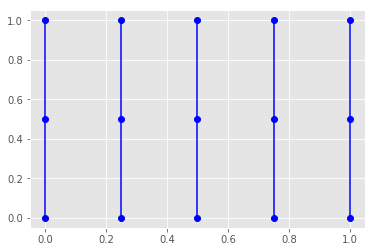

In [185]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
plt.plot(X,Y,marker='o',color='blue')

可以用 zip 得到网络平面图上坐标点的数据：

In [186]:
z = [i for i in zip(X.flat,Y.flat)]
z

[(0.0, 0.0),
 (0.25, 0.0),
 (0.5, 0.0),
 (0.75, 0.0),
 (1.0, 0.0),
 (0.0, 0.5),
 (0.25, 0.5),
 (0.5, 0.5),
 (0.75, 0.5),
 (1.0, 0.5),
 (0.0, 1.0),
 (0.25, 1.0),
 (0.5, 1.0),
 (0.75, 1.0),
 (1.0, 1.0)]

In [188]:
points = np.arange(-5,5,0.01)  # 1000 equally spaced points
xs,ys = np.meshgrid(points,points)
ys

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
       ...,
       [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
       [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
       [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]])

In [189]:
z = np.sqrt(xs ** 2,ys ** 2)
z

array([[5.  , 4.99, 4.98, ..., 4.97, 4.98, 4.99],
       [5.  , 4.99, 4.98, ..., 4.97, 4.98, 4.99],
       [5.  , 4.99, 4.98, ..., 4.97, 4.98, 4.99],
       ...,
       [5.  , 4.99, 4.98, ..., 4.97, 4.98, 4.99],
       [5.  , 4.99, 4.98, ..., 4.97, 4.98, 4.99],
       [5.  , 4.99, 4.98, ..., 4.97, 4.98, 4.99]])

我们用 matplotlib 把图画出来：

Text(0.5,1,'Image plot of $\\sqrt{x^2 + y^2}$ for a grid of values')

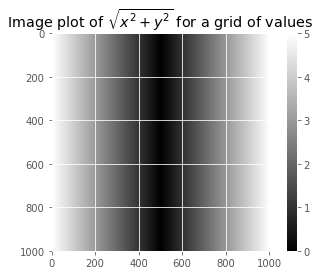

In [190]:
plt.imshow(z,cmap = plt.cm.gray);plt.colorbar()
plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a grid of values")

## 将条件逻辑作为数组操作

np.where 是三元表达式 x if condition else y 的向量化版本，假设我们有一个布尔值数组和两个数值数组：

In [4]:
xarr  = np.array([1.1,1.2,1.3,1.4,1.5])
yarr = np.array([2.1,2.2,2.3,2.4,2.5])
cond = np.array([True,False,True,True,False])

In [5]:
result = [(x if c else y) for x,y,c in zip(xarr,yarr,cond)]
result

[1.1, 2.2, 1.3, 1.4, 2.5]

上面的代码会产生一些问题，如果数组很大，速度会很慢，因为所有工作都是通过解释器解释执行的。其次，当数组是多维时，就无法奏效了，而使用 np.where 时，就可以非常简单地完成：

In [6]:
result = np.where(cond,xarr,yarr)
result

array([1.1, 2.2, 1.3, 1.4, 2.5])

np.where 的第一个和第二个参数不一定是数组，他们可以是标量。where 在数据分析中的一个典型用法是根据一个数组来生成一个新的数组：

In [9]:
arr = np.random.randn(4,4)
arr

array([[ 0.11396491, -0.54234073,  0.38478586,  0.29798977],
       [-1.37041587,  0.54921299,  0.35484192, -0.73915519],
       [ 0.92418545, -1.22762763,  2.12606336, -0.01421113],
       [ 1.06210783,  0.64093309,  0.69042548, -0.39992364]])

In [10]:
arr > 0

array([[ True, False,  True,  True],
       [False,  True,  True, False],
       [ True, False,  True, False],
       [ True,  True,  True, False]])

In [11]:
np.where(arr>0,2,-2)

array([[ 2, -2,  2,  2],
       [-2,  2,  2, -2],
       [ 2, -2,  2, -2],
       [ 2,  2,  2, -2]])

可以用 np.where 将标量和数组联合，例如，我们可以像下面的代码一样，将 arr 中的所有正值替换成 2：

In [12]:
np.where(arr>0,2,arr)

array([[ 2.        , -0.54234073,  2.        ,  2.        ],
       [-1.37041587,  2.        ,  2.        , -0.73915519],
       [ 2.        , -1.22762763,  2.        , -0.01421113],
       [ 2.        ,  2.        ,  2.        , -0.39992364]])

## 数学和统计方法

许多关于计算整个数组统计值或者关于轴向数据的数学函数，可以作为数组类型的方法被调用。例如 sum，mean，std（标准差）：

In [13]:
arr  = np.random.randn(5,4)

In [14]:
arr

array([[-2.19703461,  0.08578664, -0.34274858, -1.7337856 ],
       [ 1.31757418,  1.25339623, -1.27665579,  0.34619903],
       [-1.4751875 , -0.66649503, -1.41025361, -1.92824468],
       [-1.09786523, -0.39463016,  0.82031589,  0.56361594],
       [-1.18281882, -0.50330221,  1.038352  , -0.07825512]])

In [15]:
arr.mean()

-0.4431018510989217

另一种调用方式：

In [16]:
np.mean(arr)

-0.4431018510989217

In [17]:
arr.sum()

-8.862037021978434

像 mean、sum等函数可以接收一个可选参数 axis，计算指定轴上的统计值，axis = 1 为 行计算，axis = 0 为列计算：

In [18]:
arr.mean(axis =1)   # 每一行的平均值

array([-1.04694554,  0.41012841, -1.3700452 , -0.02714089, -0.18150604])

In [20]:
arr.sum(axis = 0) # 每一列的总和

array([-4.63533198, -0.22524453, -1.17099009, -2.83047042])

cumsum函数：从 0 开始元素累积和，cumprod：从 1 开始元素累积积；它们并不会聚合，而是产生一个中间结果：

In [25]:
arr = np.array([0,1,2,3,4,5,6,7])

In [26]:
arr

array([0, 1, 2, 3, 4, 5, 6, 7])

In [27]:
arr.cumsum()

array([ 0,  1,  3,  6, 10, 15, 21, 28])

In [30]:
arr.cumprod()

array([0, 0, 0, 0, 0, 0, 0, 0])

In [32]:
arr = np.array([[0,1,2],[3,4,5],[6,7,8]])

In [33]:
arr

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [34]:
arr.cumsum()

array([ 0,  1,  3,  6, 10, 15, 21, 28, 36])

In [36]:
arr.cumprod(axis = 1)

array([[  0,   0,   0],
       [  3,  12,  60],
       [  6,  42, 336]])

## 布尔值数组的方法

sum 通常可以用于计算布尔值数组中 True 的个数：

In [38]:
arr = np.random.randn(100)

In [39]:
(arr>0).sum()

53

对于布尔值数组，有两个非常有用的方法 any 和 all，any 检查数组中是否至少有一个 True，all 检查是否每个值都是 True。

In [40]:
bools = np.array([False,False,True,False])
bools.any()

True

In [41]:
bools.all()

False

这些方法也可以适用于非布尔值数组，所有的非 0 元素都会按 True 处理。

## 排序

numpy 数组可以使用 sort 方法按位置排序：

In [43]:
arr = np.random.randn(6)

In [45]:
arr

array([-0.49268294, -0.3204365 , -0.31454339,  0.24741789,  0.54794241,
        1.26426157])

In [46]:
arr.sort()

In [47]:
arr

array([-0.49268294, -0.3204365 , -0.31454339,  0.24741789,  0.54794241,
        1.26426157])

你可以根据传入的 axis 的值，沿着轴向对每个一维数据段进行排序：

In [59]:
arr = np.random.randn(5,3)

In [60]:
arr

array([[-2.76996738, -1.07380496, -0.71958789],
       [ 0.77105202, -0.43509721, -0.29942712],
       [ 0.28800598, -0.60554039, -0.97749361],
       [ 1.42897453,  0.29965924, -0.47249525],
       [ 0.52899914, -0.00915033,  0.01645154]])

In [61]:
arr.sort()

In [62]:
arr

array([[-2.76996738, -1.07380496, -0.71958789],
       [-0.43509721, -0.29942712,  0.77105202],
       [-0.97749361, -0.60554039,  0.28800598],
       [-0.47249525,  0.29965924,  1.42897453],
       [-0.00915033,  0.01645154,  0.52899914]])

np.sort() 返回的是已经排序好的数组拷贝，而不是对元素组的排序。

## 唯一值和其他集合逻辑

In [63]:
names = np.array(['Bob','Joe','Will','Bob','Will','Joe','Joe'])

In [64]:
np.unique(names)

array(['Bob', 'Joe', 'Will'], dtype='<U4')

In [66]:
ints = np.array([3,3,3,2,2,1,1,4,4])

In [67]:
np.unique(ints)

array([1, 2, 3, 4])

np.unique 带有排序的功能，与 python 实现相比较：

In [68]:
sorted(set(names))

['Bob', 'Joe', 'Will']

np.in1d 可以检查一个数组中的值，是否在另外一个数组中，并返回一个布尔值数组：

In [69]:
values = np.array([6,0,0,3,2,5,6])

In [70]:
np.in1d(values,[2,3,6])

array([ True, False, False,  True,  True, False,  True])

## 伪随机数的生成

numpy.random 在生成大型样本时，比纯 python 的方式快了一个数量级：

In [71]:
from random import normalvariate

In [72]:
N = 1000000

In [73]:
%timeit samples = [normalvariate(0,1) for _ in range(N)]

639 ms ± 7.23 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [74]:
%timeit np.random.normal(size=N)

26.7 ms ± 807 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


我们可以称这些为 伪随机数，因为它们是由具有确定性行为的算法根据随机数生成器中的随机数种子生成的，可以通过 np.random.seed 更改 numpy 的随机数种子：

In [75]:
np.random.seed(1234)

numpy.random 中的数据生成函数公用了一个全局的随机数种子。为了避免全局状态，可以使用 numpy.random.RandomState 生成一个随机数生成器，使数据独立于其他的随机数状态：

In [76]:
rng = np.random.RandomState(1234)

In [77]:
rng.randn(10)

array([ 0.47143516, -1.19097569,  1.43270697, -0.3126519 , -0.72058873,
        0.88716294,  0.85958841, -0.6365235 ,  0.01569637, -2.24268495])

## 随机漫步

首先用内建 random 模块利用纯 python 实现一个 1000 步的随机漫步：

In [88]:
import random
position = 0
walk=[position]
steps = 1000
for i in range(steps):
    step = 1 if random.randint(0,1) else -1
    position+=step
    walk.append(position)

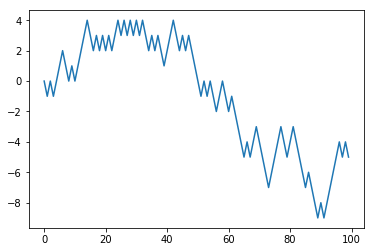

In [89]:
import matplotlib.pyplot as plt
plt.plot(walk[:100])
plt.show()

使用 numpy

In [90]:
nsteps  = 1000

In [95]:
draws = np.random.randint(0,2,size=nsteps)
steps = np.where(draws > 0,1,-1)
walk = np.cumsum(steps)

In [96]:
walk.min()

-35

In [97]:
walk.max()

18

假如我们想要知道漫步中是何时朝某个方向连续走了10步，可以使用 np.abs(walk) >= 10，给我们一个布尔数组，用于表明漫步是否连续在同一方向上走了10步：

In [102]:
np.abs(walk)>=10

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False,  True,
       False,  True,

In [101]:
(np.abs(walk) >= 10).argmax()

37

## 一次性模拟多次随机漫步

如果我们的目标是模拟多次随机漫步，比如说5000个，可以生成一个二维数组：

In [104]:
nwalks = 5000
nsteps = 1000
draws = np.random.randint(0,2,size=(nwalks,nsteps)) # 0 或 1
steps = np.where(draws > 0,1,-1)
walks = steps.cumsum(1)
walks

array([[ -1,  -2,  -3, ..., -26, -27, -28],
       [  1,   0,   1, ..., -18, -17, -16],
       [ -1,   0,   1, ...,  -6,  -5,  -6],
       ...,
       [ -1,  -2,  -1, ...,  34,  35,  34],
       [ -1,  -2,  -3, ...,  22,  23,  22],
       [ -1,   0,   1, ..., -18, -17, -16]])

现在我们可以计算出这些随机漫步的最大值最小值了：

In [105]:
walks.max()

137

In [106]:
walks.min()

-137

让我们在这些随机漫步中计算出 30 会 -30 的最小穿越时间，因为并不是所有的 5000 都达到了 30，我们可以用 any 来检查一下：

In [107]:
hits30 = (np.abs(walks)>=30).any(1)

In [108]:
hits30

array([ True, False, False, ...,  True, False,  True])

In [109]:
hits30.sum()

3430

我们可以用布尔值数组来选出绝对步数超过 30 的步的所在的行，并用 argmax 从轴向 1 上获取穿越时间：

In [110]:
crossing_times = (np.abs(walks[hits30])>= 30).argmax(1)

In [111]:
crossing_times.mean()

506.1399416909621